# Kelime Sayacı

Her şeyden önce böyle bir projeyi neden geliştireceğimizi, nerelerde kullanabileceğimizi bilmeliyiz. Yani bizler bu projeyi yaparak hangi açığı kapatmış olacağız? Aslına bakarsanız bu proje tek başına pek de bir anlam ifade etmeyecek. Birden çok proje yapacağız ve projeler birbirlerinin devamı niteliğinde olacak. İşte bu projelerin birleşiminde kelime sayacının da rolü büyük oluyor.

## Kelime Saymak Ne Oluyor?

Eğer Linux/Unix işletim sistemlerinden birine sahipseniz Terminal ile kullanılan <b>wc</b> komutunu biliyor olabilirsiniz. Komutun işlevini bilmeyenler için açıklayalım. Bir dosyanın kaç satırdan, kaç kelimeden ve kaç karakterden oluştuğunu size söyleyebilen bir komut. Benzer bir program da biz yazdık. Örnek çıktıyı aşağıda görebiliriz:

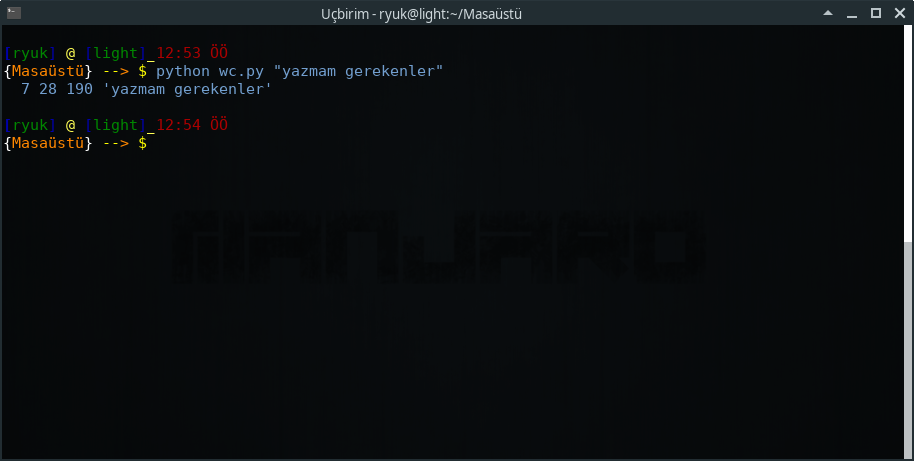

In [2]:
from IPython.display import Image
Image("Resimler/Image01.png")

En solda bulunan sayı dosyanın kaç satırdan oluştuğunu belirtiyor. Ortadaki sayı bu dosyanın sahip olduğu kelime sayısını, üçüncü sayı ise dosyada bulunan toplam karakter sayısını temsil ediyor. Sayılardan sonra yer alan ifade ise taranan dosyanın adı oluyor.

Bu fotoğrafta yer alan programı birazdan kodlayacağız. Ancak kodlamaya geçmeden önce bu programı ne amaçla kullanabileceğimize dair örnekler vermek, devamında yazacağımız programların mantığını ve gerekliliğini anlamak için önemlidir.

Boyutu çok büyük olan dosyaları taşımak, bir web sayfasına yüklemek ya da bir web uygulaması aracılığı ile bir başka kimseye göndermek yahut da buna benzer senaryolar ile eminim ki karşılaşmıssınızdır. Dosyayı sıkıştırıp tek dosya halinde tutmaya devam ederek bazen çözüme kavuşamayabiliriz. Boyutu çok ciddi seviyelerde olan dosyalar ile çalışıyorsanız bu olayı yaşamışsınız demektir.

Büyük boyutlu dosyaları belirlediğimiz sayıda parçalara ayırabileceğimiz ve yine taşıma sonrasında bu parçaları birleştirebileceğimiz program oldukça işe yarardı değil mi? Evet, bu olaya güzel bir çözüm üretmiş olurduk. Ve yine evet, bu işlevi yapan programlar mevcut, burada yoktan var ettiğimiz bir fikir yok. Ancak var olanı anlamak ve gerekirse çıkarlarımız doğrultusunda değiştirmek ya da yeni baştan yazmak var burada.

Parçalara ayrılacak olan dosyayı hangi ölçüte göre böleceğimizi bilmemiz ve asıl dosyada bu ölçütün hangi boyutta olduğunu bilmemiz gerekiyor. Örneğin; on milyon satırdan oluşan bir dosyanın mevcut olduğunu varsayalım. Ancak henüz dosyanın kaç satırdan oluştuğunu bilmiyorsunuz ve dosyayı satır sayısına göre bölmek istiyorsunuz. Yani kısaca "ben bu dosyayı iki yüz bin satırlar halinde eşit parçalara böleceğim" diyeceksiniz ama dosyanızın kaç satırdan oluştuğunu bilmiyorsunuz ki diyesiniz.

Ya da dosyayı satır değil de kelime sayısına göre bölmek istediniz. Bu durumda da kelime sayısını biliyor olmanız gerekmekte. Son durum olarak dosyanızı içerdiği karakter sayısına göre bölmek isterseniz de yine bu dosyanın kaç karakterden oluştuğunu bilmeniz gerekecek.

İşte tam da bu anda yardımımıza koşacak, tek bir satır komut ile çalışıp hızlıca sonuç üretecek bir program o kadar işe yarardı ki... Ne Internette aramak, ne indirmek ne de GUI kullanmak. Bunun yerine komut satırından çağırabileceğimiz, tek bir satırda işletebileceğimiz, küçük boyutlu ama çok işlevli bir program yazacağız. Ve bu programın adı: <b>Kelime Sayacı</b>

## Programın Yazılması

WordCounter adıyla kullanacağımız bir sınıf yazarak işe koyulalım. Sınıf, örneklenmeye ihtiyaç duymayacağından ve herhangi bir sınıf niteliği de barındırmayacağından dolayı tüm metotlarını @staticmethod bezeyicisi ile bezeyeceğiz.

In [3]:
class WordCounter:
    @staticmethod
    def check_arguments(option):
        pass

Birinci metodun işlevi argümanları kontrol etmesi olsun. Hangi argümanları? Program komut satırından çağrılacağı ve ister yalnızca satır, ister yalnızca kelime, ister yalnızca karakter sayısını gösterecek bir yapıya sahip olacağından dolayı parametre. Kullanıcı, komut satırında <b>-l -w -c</b> (Line, Word, Character - Satır, Kelime, Karakter) gibi parametreler kullandığında parametreye göre program farklı sonuç üretecek. Eğer hiçbir parametre verilmemişse tüm bilgileri yukarıdaki fotoğrafta görüldüğü biçimde gösterecek.

Argümanların neler olabileceğini gördük. Şimdi de bu argümanların doğruluğunu kontrol eden bir metot yazacağız. Ancak metodu yazmadan önce şuna karar vermeliyiz. Kullanıcı, komutu kullanırken önce bu parametreleri mi yoksa dosya adını mı girmeli. Alışıldığı gibi önce parametreleri girsin kullanıcımız. O halde sys modülünde bulunan argv niteliğini dosyamıza import edelim.

In [4]:
from sys import argv

class WordCounter:
    @staticmethod
    def check_arguments(option):
        pass

Metoda parametre olarak verilen <i>option</i> kelimesi dosya çalıştırılırken yazılan parametreyi alacak. 

Program akışında zaman zaman durdurmalar olabilir. Örneğin hatalı parametre kullanımının sonucunda program akışı kesilip sonlanabilir. Bunu yapabilmek için yine sys modülünde yer alan exit() fonksiyonunu kullanabiliriz. O halde onu da import edelim.

In [5]:
from sys import argv, exit

class WordCounter:
    @staticmethod
    def check_arguments(option):
        pass

Argümanların kontrolünü yapmak oldukça kolay. Argümanların ilki her zaman Python dosyasının kendisi olduğuna göre ve bu programda en son olarak dosya adı girildiğine göre ortada yer alan ifade bu dosyaya verilen parametre olacaktır. Bu da argümanlar listesinin 1. indeksinde yer alan ifadedir. main() fonksiyonu yazacağımız zaman bu metoda argümanların 1. indeksinde yer alan karakter dizisini vereceğiz.

In [7]:
from sys import argv, exit

class WordCounter:
    @staticmethod
    def check_arguments(option):
        allowed_args = '-l','-w','-c','--help'
        if option in allowed_args:
            return True
        else:
            return False

Kabul edilen argümanlara bir yenisini daha ekledik, --help argümanı. Pek çok komutta bu argüman kullanıldığında bir yardım sayfası ekrana bastırılır. Biz de aynı şekilde bu argümanın kullanılması durumunda bir yardım sayfası gösterelim. Bunun için de yardım sayfasını görüntüleyen bir metot oluşturalım.

In [11]:
from sys import argv, exit

class WordCounter:
    @staticmethod
    def check_arguments(option):
        allowed_args = '-l','-w','-c','--help'
        if option in allowed_args:
            return True
        else:
            return False
    
    
    @staticmethod
    def help_page():
        msg = """
        Word Counter -- Help Page
        
    Word Counter, dosyalarınızda kaç satır, kelime ve karakter olduğunu gösteren, Python ile kodlanmış bir programdır.

        
        -- wdc [OPTION] [FILE]
        
        Examples:
        wdc -l example.txt
        wdc -w example.txt
        wdc -c example.txt
        wdc example.txt
        
        
        -l:\t Dosyadaki satır sayısını göster
        -w:\t Dosyadaki kelime sayısını göster
        -c:\t Dosyadaki karakter sayısını göster
        
    Herhangi bir parametre kullanılmadığında tüm bilgiler gösterilir.
        
        """
        return msg

Neden metot içerisinde <i>print()</i> kullanmak yerine <i>return</i> kullandık? Bir program yazarken sınıfların ve metotların başkaları tarafından da import edilip kullanılabileceğini göz önünde bulundurarak metotlar içerisinde işlem yapmak yerine geriye bir değer döndürmek akıllıca olacaktır.

Argümanları kontrol etme ve yardım sayfası görüntüleme işlemleri tamamlandı. Sıra geldi dosyayı kontrol etmeye. Dosyanın nesini kontrol edeceğiz? Dosya diye yazılan argüman dosya olmayabilir, dizin olabilir. Bu durumda işlem yapmak yerine bir hata olduğunu belirten değer döndürelim.

Eğer dosya olduğu söylenilen argüman dosya ise geriye 1 değerini, dizin ise 2 değerini, link ise 3 değerini döndürelim. Bu sayede kontrol yapısı kurmak kolaylaşacaktır. İyi de dizin mi, dosya mı yoksa link mi olduğunu nasıl anlayacağız? Kodlarımızın başına bir import satırı daha ekleyerek bu sorunu da def edelim.

In [13]:
from os.path import isdir, isfile, islink

İmport ettiğimiz fonksiyonlar geriye True ya da False değerlerini döndürürler. Bu fonksiyonlar aracılığı ile dosyanın kontrol edilmesi için koşullar barındıran bir metot yazalım. Bu arada dikkat ettiyseniz metotlar herhangi bir sınıf ya da nesne niteliğine ihtiyaç duymadığı için hepsini <i>@staticmethod</i> ile beziyoruz.

In [1]:
from os.path import isdir, isfile, islink
from sys import argv, exit

class WordCounter:
    @staticmethod
    def check_arguments(option):
        allowed_args = '-l','-w','-c','--help'
        if option in allowed_args:
            return True
        else:
            return False
    
    
    @staticmethod
    def help_page():
        msg = """
        Word Counter -- Help Page
        
    Word Counter, dosyalarınızda kaç satır, kelime ve karakter olduğunu gösteren, Python ile kodlanmış bir programdır.

        
        -- wdc [OPTION] [FILE]
        
        Examples:
        wdc -l example.txt
        wdc -w example.txt
        wdc -c example.txt
        wdc example.txt
        
        
        -l:\t Dosyadaki satır sayısını göster
        -w:\t Dosyadaki kelime sayısını göster
        -c:\t Dosyadaki karakter sayısını göster
        
    Herhangi bir parametre kullanılmadığında tüm bilgiler gösterilir.
        
        """
        return msg
    
    
    @staticmethod
    def check_file(file):
        if isfile(file):
            return 1
        
        elif isdir(file):
            return 2
        
        elif islink(file):
            return 3
        
        else:
            return "Unknown"

<i>check_file()</i> metodu yalnızca bir parametre alıyor. O da kontrol edeceği dosya/dosya yolu. Yukarıda da belirtildiği gibi verilen parametrenin dosya, dizin ya da link olmasına karşın belli değeri döndürüyor. Eğer bilinmeyen cinste bir şey gelirse -ki böyle bir şey ile hiç karşılaşmadım- geriye 'Unknown' değeri dönüyor.

Dosya ve parametreler kontrol edildiğine göre işlem yapmaya hazırız demektir. Ancak işlemler dosya çalıştırılırken verilen parametrelere göre değişiklik göstereceğinden tüm işlemleri ayrı ayrı metotlar halinde yazmak mantıklı olacaktır. Örneğin -l parametresine karşın yalnızca satır sayısını hesaplayan bir metot yazmalıyız. Aynı şekilde yalnızca kelime, yalnızca karakter sayısını hesaplayan metotlar yazmalıyız.

In [3]:
    @staticmethod
    def line_count(file=None, data=None):
        if not data:
            # Eğer ki verilmiş bir data yoksa
            with open(file) as f:
                data = f.read()
        
        l = data.count('\n') + 1
        
        if data[-1] == '\n':
            l -= 1
        
        return l

Metoda hem file hem de data şeklinde parametreler ekledik. Data da ne oluyor? Data, okunmuş olan dosyanın içeriği oluyor. İyi de henüz okumadık ki. Şu an için öyle görünüyor ama main() fonksiyonu daha yazmadık. Belki de main() içerisinde okuruz ve tekrar tekrar metotların okumasına gerek kalmasın diye direkt olarak parametreye data veririz. Ayrıca bu metotların bir başka programcı tarafından ya da biz tarafından bir başka programa import edilip kullanılabileceğini de unutmayalım. Direkt olarak burada okumak yerine bir başka programdan datanın aktarılabileceğini göz önünde bulundurmalıyız.

Satır sayısını hesaplama işlemini nasıl yaptık? Bildiğiniz gibi her satır başı yaptığımızda metne '\n' karakteri ekleniyor. Dolayısı ile ilk işimiz bu karakterin datada kaç kez tekrar ettiği bilgisini almak oldu. Ardından bu sayıya 1 ekledik. Neden mi? Tek bir satır yazdığınızı düşünün, satırın sonunda alta geçmezseniz metinde bir satır yer almasına rağmen '\n' karakteri bulunmayacaktır. Dolayısını ile bu sayı 0 gelecektir. +1 işlemi sayesinde ilk satırı da bu sayıya eklemiş bulunuyoruz. Eğer metnin sonu '\n' karakteri ile bitiyorsa, yani satır başı yapılmış ama satıra hiçbir şey yazılmamışsa bu sayıdan 1 çıkarıyoruz.

In [7]:
    @staticmethod
    def word_count(file=None, data=None):
        if not data:
            # Eğer ki verilmiş bir data yoksa
            with open(file) as f:
                data = f.read()
        
        data = data.replace('\n', ' ')
        w = len(data.split(' '))
        
        return w

Bir önceki satır sayısı hesaplayan metoda oldukça benzeyen bir metot değil mi? Kelime sayısını nasıl hesapladık? Öncelikle bir metin üzerinden düşünelim, örneğin bu okuduğunuz paragrafa bakın, kelimeler birbirinden boşluklar ile ayrılıyor değil mi? O halde boşluk sayısı bize kelime sayısını verecektir. Ancak bir eksik var. Siz bu yazılara bakarken bazen satır başı yapıldığını görüyorsunuz, yani gözünüze bir boşluk görünüyor. Bilgisayarda ise satır başı olunca iki kelime arası şu şekilde görünüyor: kelime1\nkelime2

Bu durumda saymamız gereken bir şey daha var, satır başı kaçış dizisi. Direkt olarak sayısını almak yerine tüm '\n' karakterlerini boşluk (' ') karakterine çevirdik. Ardından datadaki tüm boşluk karakterlerinin kesilmesini ve kalanların birer öğe olup liste oluşturmasını istedik. Listelerden hatırlıyoruz değil mi, split() metodu bu işe yarıyordu. Ve son olarak bu listenin öğe sayısını <i>w</i> değişkenine aktarıp <i>return</i> ediyoruz.

In [8]:
    @staticmethod
    def char_count(file=None, data=None):
        if not data:
            # Eğer ki verilmiş bir data yoksa
            with open(file) as f:
                data = f.read()
        
        c = len(data)
        
        return c

Karakter sayısı hesaplamak oldukça basit, direkt olarak datanın uzunluğunu len() fonksiyonu ile belirliyor ve <i>return</i> ediyoruz.

Hesaplama işlemleri de tamam olduğuna göre main() fonksiyonu yazmaya başlayabiliriz. Ancak öncesinde tüm kodlara bir bakalım, hata olmaması açısından tümünü birden görelim:

In [12]:
from os.path import isdir, isfile, islink
from sys import argv, exit

class WordCounter:
    @staticmethod
    def check_arguments(option):
        allowed_args = '-l','-w','-c','--help'
        if option in allowed_args:
            return True
        else:
            return False
    
    
    @staticmethod
    def help_page():
        msg = """
        Word Counter -- Help Page
        
    Word Counter, dosyalarınızda kaç satır, kelime ve karakter olduğunu gösteren, Python ile kodlanmış bir programdır.

        
        -- wdc [OPTION] [FILE]
        
        Examples:
        wdc -l example.txt
        wdc -w example.txt
        wdc -c example.txt
        wdc example.txt
        
        
        -l:\t Dosyadaki satır sayısını göster
        -w:\t Dosyadaki kelime sayısını göster
        -c:\t Dosyadaki karakter sayısını göster
        
    Herhangi bir parametre kullanılmadığında tüm bilgiler gösterilir.
        
        """
        return msg
    
    
    @staticmethod
    def check_file(file):
        if isfile(file):
            return 1
        
        elif isdir(file):
            return 2
        
        elif islink(file):
            return 3
        
        else:
            return "Unknown"
        
    
    @staticmethod
    def line_count(file=None, data=None):
        if not data:
            # Eğer ki verilmiş bir data yoksa
            with open(file) as f:
                data = f.read()
        
        l = data.count('\n') + 1
        
        if data[-1] == '\n':
            l -= 1
        
        return l
    
    
    @staticmethod
    def word_count(file=None, data=None):
        if not data:
            # Eğer ki verilmiş bir data yoksa
            with open(file) as f:
                data = f.read()
        
        data = data.replace('\n', ' ')
        w = len(data.split(' '))
        
        return w
    
    
    @staticmethod
    def char_count(file=None, data=None):
        if not data:
            # Eğer ki verilmiş bir data yoksa
            with open(file) as f:
                data = f.read()
        
        c = len(data)
        
        return c
    

Kodlarımız hem şık hem de gelişime açık biçimde duruyor. Yani ileride herhangi bir program tarafından kullanılabilir vaziyette.

In [23]:
def main():
    if len(argv) == 2:
        # No Arguments
        file_or_arg = argv[1]
        if file_or_arg == '--help':
            print(WordCounter.help_page())
            exit()
            
        
        if WordCounter.check_file(file_or_arg) == 1:
            # Print All Options
            with open(file_or_arg) as f:
                data = f.read()
                
            result = " {} {} {}  :'{}'".format(WordCounter.line_count(data=data),
                                              WordCounter.word_count(data=data),
                                              WordCounter.char_count(data=data),
                                              file_or_arg)
            
            print(result)
        
        elif WordCounter.check_file(file_or_arg) == 2:
            print("Bu bir dizin!")
            exit()
        
        elif WordCounter.check_file(file_or_arg) == 3:
            print("Bu bir link!")
            exit()
            
        else:
            print("Biçim tanınmıyor!")
            exit()
            
    
    elif len(argv) == 3:
        # Have One Argument
        file = argv[2]
        option = argv[1]
        if WordCounter.check_arguments(option) and WordCounter.check_file(file):
            if option == '-l':
                result = " {}  :'{}'".format(WordCounter.line_count(file=file),
                                            file)
                
                print(result)
            
            elif option == '-w':
                result = " {}  :{}".format(WordCounter.word_count(file=file),
                                          file)
                
                print(result)
            
            elif option == '-c':
                result = " {}  :{}".format(WordCounter.char_count(file=file),
                                          file)
                
                print(result)
            
            else:
                print(WordCounter.help_page())
        
        else:
            print(WordCounter.help_page())
    
    else:
        print(WordCounter.help_page())
            

main() fonksiyonunda neler yaptık, açıklayalım. Öncelikle komut satırında girilen argüman sayısını ölçüyoruz. İki ya da üç olduğu durumlarda çalışıyor aksi durumda yardım sayfasını görüntülüyoruz. Argüman sayısının iki olduğu durumda düşünülebilecek iki senaryo var, ya dosya adı girilmiştir ya da '--help' argümanı yazılmıştır. '--help' olup olmadığını kontrol ediyoruz. Eğer doğru ise yardım sayfasını görüntüleyip program akışını bitiriyoruz. Eğer '--help' değilse dosya adı olduğunu düşünüp bir dosya mı değil mi diye kontrol ediyoruz. Dosya, dizin ya da link olma durumlarının kontrolünden sonra dizin ve link olma durumlarında gerekli çıktıyı veriyoruz. Eğer ki bunlardan hiçbiri değilse 'Biçim tanınmıyor!' şeklinde çıktı gösteriyoruz.

Dosya olduğu doğrulanırsa dosyayı bir seferliğine okuyup <i>data</i> isimli değişkende tutuyoruz. Ardından Sınıfımızın satır, kelime ve karakter sayan metotlarını çağırıp bu data değişkenini parametre olarak yazıyoruz. Bu sayede metotlar kendi içerisinde tekrar tekrar dosya okuma zahmetine girmiyor. Eğer data vermeyip dosya adı verseydik bu defa dosyayı açıp okuyacaklardı.

Datadan sonuçlar üretildikten sonra result isimli bir değişkende format metodu ile biçimlendirerek güzel bir çıktı oluşturuyoruz. Ve bu çıktıyı ekrana basıyoruz.

Argüman sayısının üç olduğu durumlarda düşünelecek senaryolar şunlar: ya doğru parametrelerden biri kullanılmıştır ya da hatalı bir kullanım söz konusudur. Eğer doğru bir parametre kullanıldıysa -ki bunu hem parametreleri hem de dosya adını kontrol eden metotları tek bir if deyimi içinde kullanarak yapıyoruz- kullanılan parametreye göre bir sonuç üretip format metodu ile biçimlendirdikten sonra ekrana basıyoruz. Beklenen durumlar haricinde bir giriş yapılmışsa her defasında yardım sayfasını görüntülüyoruz. Bu sayede kullanıcımız bu programı nasıl kullanacağını öğrenmiş oluyor.

Son olarak yazmamız gereken bir koşul var. Bu Python dosyası bir modül olarak mı kullanılıyor yoksa doğrudan mı çalıştırılıyor? Doğrudan çalıştırılıyor ise main() fonksiyonu çalıştıracağız. Yok eğer modül olarak import edilmişse hiçbir şey yapmayacağız.

In [ ]:
if __name__ == '__main__':
    main()

else:
    pass

En son ne yaptık? Her Python dosyasının ' __ name __ ' şeklinde bir niteliği olur ve bu nitelik eğer Python dosyası doğrudan çalıştırılıyor ise ' __ main __ ' olur. Biz de bunu kontrol ettik ve doğrudan çalıştırılmışsa main() fonksiyonu devreye soktuk. Doğrudan çalıştırılmamış ise belli ki modül olarak import edilmiş. Bu durumda main() fonksiyonu çalıştırmadık.

Dilerseniz son olarak tüm kodlara bir bakalım:

In [ ]:
from os.path import isdir, isfile, islink
from sys import argv, exit

class WordCounter:
    @staticmethod
    def check_arguments(option):
        allowed_args = '-l','-w','-c','--help'
        if option in allowed_args:
            return True
        else:
            return False
    
    
    @staticmethod
    def help_page():
        msg = """
        Word Counter -- Help Page
        
    Word Counter, dosyalarınızda kaç satır, kelime ve karakter olduğunu gösteren, Python ile kodlanmış bir programdır.

        
        -- wdc [OPTION] [FILE]
        
        Examples:
        wdc -l example.txt
        wdc -w example.txt
        wdc -c example.txt
        wdc example.txt
        
        
        -l:\t Dosyadaki satır sayısını göster
        -w:\t Dosyadaki kelime sayısını göster
        -c:\t Dosyadaki karakter sayısını göster
        
    Herhangi bir parametre kullanılmadığında tüm bilgiler gösterilir.
        
        """
        return msg
    
    
    @staticmethod
    def check_file(file):
        if isfile(file):
            return 1
        
        elif isdir(file):
            return 2
        
        elif islink(file):
            return 3
        
        else:
            return "Unknown"
        
    
    @staticmethod
    def line_count(file=None, data=None):
        if not data:
            # Eğer ki verilmiş bir data yoksa
            with open(file) as f:
                data = f.read()
        
        l = data.count('\n') + 1
        
        if data[-1] == '\n':
            l -= 1
        
        return l
    
    
    @staticmethod
    def word_count(file=None, data=None):
        if not data:
            # Eğer ki verilmiş bir data yoksa
            with open(file) as f:
                data = f.read()
        
        data = data.replace('\n', ' ')
        w = len(data.split(' '))
        
        return w
    
    
    @staticmethod
    def char_count(file=None, data=None):
        if not data:
            # Eğer ki verilmiş bir data yoksa
            with open(file) as f:
                data = f.read()
        
        c = len(data)
        
        return c
    
    

def main():
    if len(argv) == 2:
        # No Arguments
        file_or_arg = argv[1]
        if file_or_arg == '--help':
            print(WordCounter.help_page())
            exit()
            
        
        if WordCounter.check_file(file_or_arg) == 1:
            # Print All Options
            with open(file) as f:
                data = f.read()
                
            result = " {} {} {}  :'{}'".format(WordCounter.line_count(data=data),
                                              WordCounter.word_count(data=data),
                                              WordCounter.char_count(data=data),
                                              file_or_arg)
            
            print(result)
        
        elif WordCounter.check_file(file_or_arg) == 2:
            print("Bu bir dizin!")
            exit()
        
        elif WordCounter.check_file(file_or_arg) == 3:
            print("Bu bir link!")
            exit()
            
        else:
            print("Biçim tanınmıyor!")
            exit()
            
    
    elif len(argv) == 3:
        # Have One Argument
        file = argv[2]
        option = argv[1]
        if WordCounter.check_arguments(option) and WordCounter.check_file(file):
            if option == '-l':
                result = " {}  :'{}'".format(WordCounter.line_count(file=file),
                                            file)
                
                print(result)
            
            elif option == '-w':
                result = " {}  :{}".format(WordCounter.word_count(file=file),
                                          file)
                
                print(result)
            
            elif option == '-c':
                result = " {}  :{}".format(WordCounter.char_count(file=file),
                                          file)
                
                print(result)
            
            else:
                print(WordCounter.help_page())
        
        else:
            print(WordCounter.help_page())
    
    else:
        print(WordCounter.help_page())
            
            

if __name__ == '__main__':
    main()

else:
    pass     


Bu kodlara şu adresten erişebilirsiniz: xxxx

Eğer bu dosyayı __wdc__ adı ile PATH'e eklemek isterseniz GNU/Linux için bağlantı (link) oluşturabilirsiniz. Bunun yolu da Terminal penceresine bir komut yazmaktan geçer. Öncelikle kodlarımızın başına bir satır ekleyeceğiz. 

In [20]:
#!/usr/bin/python

Eğer Python3'e erişmek için 'python3' yazıyorsanız bu satırı şu şekilde değiştirin:

In [21]:
#!/usr/bin/python3

Bu satırı kodların en başına ekledikten sonra Terminal açıp şunu yazarak programı çalıştırılabilir hale getirebiliriz:

<i>chmod +x <program_dosyası></i>

Şimdi de dosyayı PATH dizinlerinden birine ekleyelim:

<i>sudo cp [program_dosyasi] /usr/bin/wdc</i>

Artık programımıza Terminal penceresi üzerinden direkt erişim sağlayabilir ve herhangi bir dizinde herhangi bir dosyayı taratabiliriz. Örnek bir görüntü aşağıda yer almaktadır.

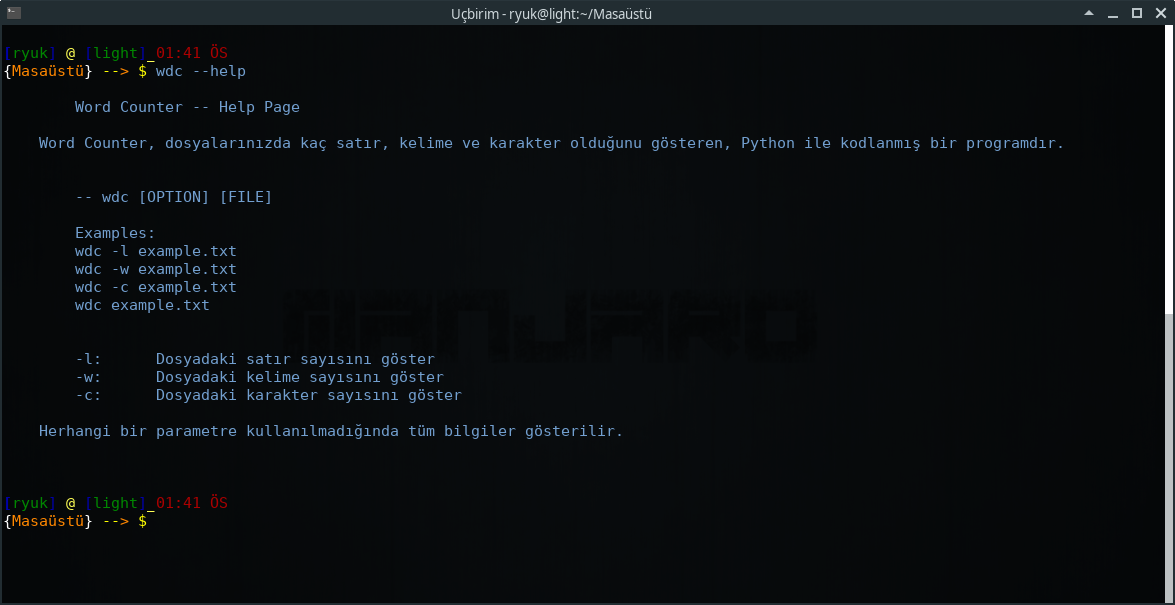

In [24]:
from IPython.display import Image
Image("Resimler/wdc.png")

<b>Word Counter</b> projesinin sonuna geldik. Bir sonraki projemiz bu projenin devamı ancak bir başka proje olacaktır. Kelime sayacını kullanarak bir dosyayı hangi ölçüte göre böleceğimizi belirleyip bölme işlemini yapacağız.